In [1]:
import pandas as pd

from pycaret.regression import *
import numpy as np
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [2]:
df = pd.read_csv("USA_NHANES_2015-2016_ParticipantData.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8506 entries, 0 to 8505
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   8506 non-null   int64  
 1   hh_id                0 non-null      float64
 2   country              8506 non-null   object 
 3   sec_area             0 non-null      float64
 4   tert_area            0 non-null      float64
 5   round                8506 non-null   int64  
 6   smpl_weight          8506 non-null   float64
 7   sex                  8506 non-null   int64  
 8   age                  8506 non-null   float64
 9   edc_level            0 non-null      float64
 10  edc                  0 non-null      float64
 11  residence            0 non-null      float64
 12  preg_lact            1076 non-null   float64
 13  breastfeeding        8506 non-null   int64  
 14  hh_head              0 non-null      float64
 15  wgt                  8434 non-null   f

In [3]:
df_aft_drop = df.drop(['hh_id','sec_area','tert_area','edc_level', 'edc','residence','hh_head','bmi_children','misrep','clin_diet_other','note'], axis=1)

In [4]:
df_aft_drop.head()

,id,country,round,smpl_weight,sex,age,preg_lact,breastfeeding,wgt,wgt_method,hgt,hgt_method,bmi_adults,bmi_cat,pa,pa_cat,smok,special_diet,special_diet_other,clin_diet,smpl_weight_24hr1,smpl_weight_24hr2,edc_level_adults,edc_level_children,race,country_birth,marital_status,hh_size,fam_size,hh_income,fam_income,recum_length,recum_length_method,bmi_chld,psu,stratum
0,83732,United States of America,1,135629.507405,1,62.0,NaN,0,94.8,1.0,184.5,1.0,27.799999,3.0,920.0,2.0,2.0,0.0,NaN,0.0,92670.699919,69945.934107,5.0,NaN,3,1.0,1.0,2,2,10.0,10.0,NaN,NaN,NaN,1,125
1,83733,United States of America,1,25282.425927,1,53.0,NaN,0,90.4,1.0,171.4,1.0,30.799999,4.0,NaN,NaN,1.0,0.0,NaN,0.0,16454.105994,13190.268870,3.0,NaN,3,2.0,3.0,1,1,4.0,4.0,NaN,NaN,NaN,1,125
2,83734,United States of America,2,12575.838818,1,78.0,NaN,0,83.4,1.0,170.1,1.0,28.799999,3.0,3840.0,3.0,2.0,3.0,NaN,NaN,6529.619788,4928.422423,3.0,NaN,3,1.0,1.0,2,2,5.0,5.0,NaN,NaN,NaN,1,131
3,83735,United States of America,2,102078.634508,2,56.0,NaN,0,109.8,1.0,160.9,1.0,42.400002,4.0,1800.0,2.0,5.0,0.0,NaN,0.0,58191.539622,0.000000,5.0,NaN,3,1.0,6.0,1,1,10.0,10.0,NaN,NaN,NaN,1,131
4,83736,United States of America,2,18234.736219,2,42.0,1.0,0,55.2,1.0,164.9,1.0,20.299999,2.0,13440.0,3.0,3.0,0.0,NaN,0.0,12358.085471,9813.677587,4.0,NaN,4,1.0,3.0,5,5,7.0,7.0,NaN,NaN,NaN,2,126


In [5]:
df_new = df.filter(['id','sex','age','wgt','hgt','misrep','pa','special_diet','clin_diet'], axis=1)

In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8506 entries, 0 to 8505
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            8506 non-null   int64  
 1   sex           8506 non-null   int64  
 2   age           8506 non-null   float64
 3   wgt           8434 non-null   float64
 4   hgt           7840 non-null   float64
 5   misrep        0 non-null      float64
 6   pa            4734 non-null   float64
 7   special_diet  8221 non-null   float64
 8   clin_diet     7953 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 598.2 KB


In [7]:
df_new = df_new[(df_new['age'] >= 18.0)  ]
df_new = df_new[(df_new['wgt'].isnull() == False)  ]
df_new = df_new[(df_new['hgt'].isnull() == False)  ]

df_new.fillna(0, inplace=True)

In [8]:
df_new.head()

,id,sex,age,wgt,hgt,misrep,pa,special_diet,clin_diet
0,83732,1,62.0,94.8,184.5,0.0,920.0,0.0,0.0
1,83733,1,53.0,90.4,171.4,0.0,0.0,0.0,0.0
2,83734,1,78.0,83.4,170.1,0.0,3840.0,3.0,0.0
3,83735,2,56.0,109.8,160.9,0.0,1800.0,0.0,0.0
4,83736,2,42.0,55.2,164.9,0.0,13440.0,0.0,0.0


In [9]:
df_new['bmi'] =df_new['wgt'] / (df_new['hgt']/100 * df_new['hgt']/100)

In [10]:
all_files = ['USA_NHANES_2015-2016_DietData_part1.csv','USA_NHANES_2015-2016_DietData_part2.csv']
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df_diet = pd.concat(li, axis=0, ignore_index=True)

In [11]:
#df_diet1 = pd.read_csv("USA_NHANES_2015-2016_DietData_part1.csv")

df_diet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345120 entries, 0 to 345119
Data columns (total 75 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  345120 non-null  int64  
 1   sex                 345120 non-null  int64  
 2   age                 345120 non-null  float64
 3   recall_n            345120 non-null  int64  
 4   recall_d            0 non-null       float64
 5   recall_m            0 non-null       float64
 6   recall_y            0 non-null       float64
 7   weekday             345120 non-null  int64  
 8   respondent          345059 non-null  float64
 9   us_intake           343957 non-null  float64
 10  consum_h            345119 non-null  float64
 11  consum_min          345119 non-null  float64
 12  meal_type           345119 non-null  float64
 13  meal_place          343171 non-null  float64
 14  eat_seq             0 non-null       float64
 15  food_type           345119 non-nul

In [11]:
df_diet.dropna(how='all', axis=1, inplace=True)

In [12]:
df_diet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345120 entries, 0 to 345119
Data columns (total 57 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  345120 non-null  int64  
 1   sex                 345120 non-null  int64  
 2   age                 345120 non-null  float64
 3   recall_n            345120 non-null  int64  
 4   weekday             345120 non-null  int64  
 5   respondent          345059 non-null  float64
 6   us_intake           343957 non-null  float64
 7   consum_h            345119 non-null  float64
 8   consum_min          345119 non-null  float64
 9   meal_type           345119 non-null  float64
 10  meal_place          343171 non-null  float64
 11  food_type           345119 non-null  float64
 12  rcp_code            227260 non-null  float64
 13  rcp_descr_eng       227260 non-null  object 
 14  rcp_amount          227260 non-null  float64
 15  ingr_code           345119 non-nul

In [13]:
df_diet.fillna(0, inplace=True)

In [14]:
merged = pd.merge(df_new, df_diet, how="inner", on=["id"])


In [15]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227267 entries, 0 to 227266
Data columns (total 66 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  227267 non-null  int64  
 1   sex_x               227267 non-null  int64  
 2   age_x               227267 non-null  float64
 3   wgt                 227267 non-null  float64
 4   hgt                 227267 non-null  float64
 5   misrep              227267 non-null  float64
 6   pa                  227267 non-null  float64
 7   special_diet        227267 non-null  float64
 8   clin_diet           227267 non-null  float64
 9   bmi                 227267 non-null  float64
 10  sex_y               227267 non-null  int64  
 11  age_y               227267 non-null  float64
 12  recall_n            227267 non-null  int64  
 13  weekday             227267 non-null  int64  
 14  respondent          227267 non-null  float64
 15  us_intake           227267 non-nul

In [16]:
merged.head()

,id,sex_x,age_x,wgt,hgt,misrep,pa,special_diet,clin_diet,bmi,sex_y,age_y,recall_n,weekday,respondent,us_intake,consum_h,consum_min,meal_type,meal_place,food_type,rcp_code,rcp_descr_eng,rcp_amount,ingr_code,ingr_descr_eng,foodex2_ingr_code,foodex2_ingr_descr,ingr_amount_proc,energy,totalpro,carb,fiber,totalfat,sfa,mufa,pufa,water,seafood_n3,chol,ca,fe,na,k,mg,zn,se,ph,cu,vitb1,vitb2,vitb3,vitb6,fol,vitb12,vitc,vita,bcarot,vitd,vite,vitk,totalsugars,totalwater,tapwater,bottledwater,food_source
0,83732,1,62.0,94.8,184.5,0.0,920.0,0.0,0.0,27.849384,1,62.0,1,7,1.0,0.0,7.0,30.0,2.0,1.0,5.0,1.0,"Beverage w/ additions: Coffee, tea with: milk,...",727.91998,12210400.0,"Coffee creamer, powder",A02PM#F24.A0F3C,"Cream powder, INTENDED-USE = Intended for use ...",3.92,21.0,0.10,2.32,0.0,1.29,0.750,0.384,0.016,0.12,0.0,0.0,0.0,0.01,5.0,26.0,0.0,0.00,0.0000,11.0,0.001,0.000,0.000,0.000,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.05,0.1,0.30,960.0,120.0,840.0,1.0
1,83732,1,62.0,94.8,184.5,0.0,920.0,0.0,0.0,27.849384,1,62.0,1,7,1.0,0.0,7.0,30.0,2.0,1.0,5.0,1.0,"Beverage w/ additions: Coffee, tea with: milk,...",727.91998,91200040.0,"Sugar substitute, saccharin, powder",A046N#F03.A06JD,"Saccharine, PHYSICAL-STATE = Powder",4.00,14.0,0.04,3.56,0.0,0.00,0.000,0.000,0.000,0.35,0.0,0.0,0.0,0.00,17.0,0.0,0.0,0.00,0.0000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,3.41,960.0,120.0,840.0,1.0
2,83732,1,62.0,94.8,184.5,0.0,920.0,0.0,0.0,27.849384,1,62.0,1,7,1.0,0.0,7.0,30.0,2.0,1.0,5.0,1.0,"Beverage w/ additions: Coffee, tea with: milk,...",727.91998,92101000.0,"Coffee, brewed",A03KC,Coffee (average strength) beverage,720.00,7.0,0.86,0.00,0.0,0.14,0.014,0.108,0.007,715.61,0.0,0.0,14.0,0.07,14.0,353.0,22.0,0.14,0.0000,22.0,0.014,0.101,0.547,1.375,0.007,14.0,0.00,0.0,0.0,0.0,0.0,0.07,0.7,0.00,960.0,120.0,840.0,1.0
3,83732,1,62.0,94.8,184.5,0.0,920.0,0.0,0.0,27.849384,1,62.0,1,7,1.0,0.0,8.0,0.0,10.0,1.0,1.0,0.0,0,0.00000,94100100.0,"Water, bottled, unsweetened",A03DT#F10.A077K,"Bottled drinking water, QUALITATIVE-INFO = Wit...",240.00,0.0,0.00,0.00,0.0,0.00,0.000,0.000,0.000,239.95,0.0,0.0,24.0,0.00,5.0,0.0,5.0,0.00,0.0000,0.0,0.017,0.000,0.000,0.000,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,960.0,120.0,840.0,1.0
4,83732,1,62.0,94.8,184.5,0.0,920.0,0.0,0.0,27.849384,1,62.0,1,7,1.0,0.0,9.0,0.0,2.0,1.0,5.0,3.0,"Bread/baked product w/additions: Breads, rolls...",103.63000,51101010.0,"Bread, white, toasted",A0BY0#F28.A07HC$F10.A07XK,"Leavened bread and similar, PROCESS = Toasting...",75.00,218.0,6.75,40.88,2.2,3.00,0.573,0.597,1.568,22.80,0.0,1.0,89.0,2.50,403.0,98.0,20.0,0.51,0.0233,77.0,0.104,0.311,0.253,2.945,0.047,120.0,0.02,0.0,0.0,0.0,0.0,0.18,2.6,4.65,960.0,120.0,840.0,1.0


In [17]:
filepath = 'diet.csv' 
merged.to_csv(filepath) 

In [18]:
df_merged_sum= merged.filter(['id','sex_x','age_x','wgt','hgt','bmi','pa','special_diet','clin_diet'], axis=1)

In [19]:
df_merged_sum.drop_duplicates()

,id,sex_x,age_x,wgt,hgt,bmi,pa,special_diet,clin_diet
0,83732,1,62.0,94.8,184.5,27.849384,920.0,0.0,0.0
59,83733,1,53.0,90.4,171.4,30.771367,0.0,0.0,0.0
98,83734,1,78.0,83.4,170.1,28.824211,3840.0,3.0,0.0
136,83735,2,56.0,109.8,160.9,42.412146,1800.0,0.0,0.0
160,83736,2,42.0,55.2,164.9,20.300081,13440.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
227035,93691,1,25.0,39.2,136.5,21.038790,0.0,0.0,0.0
227070,93695,2,76.0,59.1,165.8,21.499008,0.0,0.0,0.0
227119,93696,1,26.0,112.1,182.2,33.768274,1260.0,0.0,0.0
227160,93697,2,80.0,71.7,152.2,30.952081,0.0,0.0,0.0


In [20]:
print(merged['recall_n'].value_counts()) 

1    125123
2    102144
Name: recall_n, dtype: int64


In [21]:
df_water_intake = merged.filter(['id', 'recall_n', 'totalwater'])

In [23]:
#df_water_intake_sum = df_water_intake.groupby(['id','recall_n'])['totalwater'].sum()

In [24]:
#df_water_intake_sum.head()

In [22]:
df_water_intake_sum = pd.pivot_table(df_water_intake, index='id', columns='recall_n', aggfunc=max, fill_value=0)


In [23]:
df_water_intake_sum =df_water_intake_sum.reset_index()

In [24]:
df_water_intake_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5214 entries, 0 to 5213
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (id, )           5214 non-null   int64  
 1   (totalwater, 1)  5214 non-null   float64
 2   (totalwater, 2)  5214 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 122.3 KB


In [25]:
df_water_intake_sum.columns = ['id', 'water_d1','water_d2']

In [26]:
df_water_intake_sum.head()

,id,water_d1,water_d2
0,83732,960.0,1440.0
1,83733,507.0,480.0
2,83734,870.0,720.0
3,83735,180.0,0.0
4,83736,0.0,0.0


In [27]:
df_clean_lvl1 = pd.merge(df_merged_sum, df_water_intake_sum, how="inner", on=["id"])

In [28]:
df_clean_lvl1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227267 entries, 0 to 227266
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            227267 non-null  int64  
 1   sex_x         227267 non-null  int64  
 2   age_x         227267 non-null  float64
 3   wgt           227267 non-null  float64
 4   hgt           227267 non-null  float64
 5   bmi           227267 non-null  float64
 6   pa            227267 non-null  float64
 7   special_diet  227267 non-null  float64
 8   clin_diet     227267 non-null  float64
 9   water_d1      227267 non-null  float64
 10  water_d2      227267 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 20.8 MB


In [29]:
df_nutrition_intake = merged.filter(['id', 'recall_n', 'consum_h','energy','totalpro','carb','fiber','totalfat','sfa','mufa','pufa','water','seafood_n3','chol','ca','fe','na','k','mg','zn','se','ph','cu','vitb1','vitb2','vitb3','vitb6','fol','vitb12','vitc','vita','bcarot','vitd','vite','vitk','totalsugars'])

In [30]:
def fday(x):
    if (x > 4) and (x <= 11):
        return '1' #breakfast
    elif (x > 11) and (x <= 18):
        return'2' #lunch
    elif (x > 18) and (x <= 21) :
        return '3' #dinner
    elif (x > 21) and (x <= 24):
        return'4' #supper
    elif (x <= 4):
        return'5' #other

In [31]:
df_nutrition_intake['mealtime'] = df_nutrition_intake['consum_h'].apply(fday)
df_nutrition_intake= df_nutrition_intake.drop(['consum_h'], axis=1)

In [32]:
df_nutrition_intake.head()

,id,recall_n,energy,totalpro,carb,fiber,totalfat,sfa,mufa,pufa,water,seafood_n3,chol,ca,fe,na,k,mg,zn,se,ph,cu,vitb1,vitb2,vitb3,vitb6,fol,vitb12,vitc,vita,bcarot,vitd,vite,vitk,totalsugars,mealtime
0,83732,1,21.0,0.10,2.32,0.0,1.29,0.750,0.384,0.016,0.12,0.0,0.0,0.0,0.01,5.0,26.0,0.0,0.00,0.0000,11.0,0.001,0.000,0.000,0.000,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.05,0.1,0.30,1
1,83732,1,14.0,0.04,3.56,0.0,0.00,0.000,0.000,0.000,0.35,0.0,0.0,0.0,0.00,17.0,0.0,0.0,0.00,0.0000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,3.41,1
2,83732,1,7.0,0.86,0.00,0.0,0.14,0.014,0.108,0.007,715.61,0.0,0.0,14.0,0.07,14.0,353.0,22.0,0.14,0.0000,22.0,0.014,0.101,0.547,1.375,0.007,14.0,0.00,0.0,0.0,0.0,0.0,0.07,0.7,0.00,1
3,83732,1,0.0,0.00,0.00,0.0,0.00,0.000,0.000,0.000,239.95,0.0,0.0,24.0,0.00,5.0,0.0,5.0,0.00,0.0000,0.0,0.017,0.000,0.000,0.000,0.000,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,1
4,83732,1,218.0,6.75,40.88,2.2,3.00,0.573,0.597,1.568,22.80,0.0,1.0,89.0,2.50,403.0,98.0,20.0,0.51,0.0233,77.0,0.104,0.311,0.253,2.945,0.047,120.0,0.02,0.0,0.0,0.0,0.0,0.18,2.6,4.65,1


In [33]:
df_nutrition_intake_sum = df_nutrition_intake.groupby(['id','recall_n','mealtime']).sum()


In [34]:

df_nutrition_intake_sum = df_nutrition_intake_sum.groupby(['id','mealtime']).mean()
#df_nutrition_intake_sum= df_nutrition_intake_sum.drop(['recall_n'], axis=1)

In [35]:
#for testing
df_nutrition_intake_sum =df_nutrition_intake_sum.reset_index()
#df_nutrition_intake_sum = df_nutrition_intake.groupby(['id','mealtime']).sum()
#df_nutrition_intake_sum = df_nutrition_intake.groupby(['id','mealtime']).mean()
#df_nutrition_intake_sum
test = df_nutrition_intake_sum[(df_nutrition_intake_sum['id'] == 83732)  ]
#test = test.groupby(['id','mealtime']).mean()
test

,id,mealtime,energy,totalpro,carb,fiber,totalfat,sfa,mufa,pufa,water,seafood_n3,chol,ca,fe,na,k,mg,zn,se,ph,cu,vitb1,vitb2,vitb3,vitb6,fol,vitb12,vitc,vita,bcarot,vitd,vite,vitk,totalsugars
0,83732,1,777.136078,26.580977,88.325395,5.538858,36.098870,12.811020,11.202480,9.169722,854.714153,0.006788,184.946755,537.504136,4.617938,1160.438470,1229.277713,112.717753,2.866148,24.056656,553.381960,0.348207,0.65027,1.430692,6.396424,1.174043,185.283948,1.644654,8.947686,318.268144,158.432652,4.566277,4.591984,25.417879,35.078140
1,83732,2,1331.891997,76.152137,120.433539,11.489617,60.257993,18.080138,24.869732,11.859329,825.307581,0.024373,199.084826,438.390715,10.462718,3618.030261,1779.719023,168.040754,8.880848,24.024888,877.941638,0.752893,1.39437,1.073675,20.571559,1.540816,301.109632,2.831668,27.574599,323.008684,3070.620635,1.506802,4.292459,303.849516,27.880977
2,83732,3,154.000000,2.080000,28.705000,2.700000,4.055000,1.033500,1.090000,1.641000,143.220000,0.001000,2.000000,52.500000,0.765000,85.500000,198.000000,14.000000,0.165000,0.001850,34.500000,0.078000,0.15300,0.114500,1.064000,0.070500,55.000000,0.000000,51.050000,10.500000,68.000000,0.000000,0.720000,6.950000,17.390000


In [36]:
df_nutrition_intake_sum =df_nutrition_intake_sum.reset_index()

In [37]:
df_clean_lvl2 = pd.merge(df_clean_lvl1, df_nutrition_intake_sum, how="inner", on=["id"])

In [38]:
df_clean_lvl2.head()

,id,sex_x,age_x,wgt,hgt,bmi,pa,special_diet,clin_diet,water_d1,water_d2,index,mealtime,energy,totalpro,carb,fiber,totalfat,sfa,mufa,pufa,water,seafood_n3,chol,ca,fe,na,k,mg,zn,se,ph,cu,vitb1,vitb2,vitb3,vitb6,fol,vitb12,vitc,vita,bcarot,vitd,vite,vitk,totalsugars
0,83732,1,62.0,94.8,184.5,27.849384,920.0,0.0,0.0,960.0,1440.0,0,1,777.136078,26.580977,88.325395,5.538858,36.098870,12.811020,11.202480,9.169722,854.714153,0.006788,184.946755,537.504136,4.617938,1160.438470,1229.277713,112.717753,2.866148,24.056656,553.381960,0.348207,0.65027,1.430692,6.396424,1.174043,185.283948,1.644654,8.947686,318.268144,158.432652,4.566277,4.591984,25.417879,35.078140
1,83732,1,62.0,94.8,184.5,27.849384,920.0,0.0,0.0,960.0,1440.0,1,2,1331.891997,76.152137,120.433539,11.489617,60.257993,18.080138,24.869732,11.859329,825.307581,0.024373,199.084826,438.390715,10.462718,3618.030261,1779.719023,168.040754,8.880848,24.024888,877.941638,0.752893,1.39437,1.073675,20.571559,1.540816,301.109632,2.831668,27.574599,323.008684,3070.620635,1.506802,4.292459,303.849516,27.880977
2,83732,1,62.0,94.8,184.5,27.849384,920.0,0.0,0.0,960.0,1440.0,2,3,154.000000,2.080000,28.705000,2.700000,4.055000,1.033500,1.090000,1.641000,143.220000,0.001000,2.000000,52.500000,0.765000,85.500000,198.000000,14.000000,0.165000,0.001850,34.500000,0.078000,0.15300,0.114500,1.064000,0.070500,55.000000,0.000000,51.050000,10.500000,68.000000,0.000000,0.720000,6.950000,17.390000
3,83732,1,62.0,94.8,184.5,27.849384,920.0,0.0,0.0,960.0,1440.0,0,1,777.136078,26.580977,88.325395,5.538858,36.098870,12.811020,11.202480,9.169722,854.714153,0.006788,184.946755,537.504136,4.617938,1160.438470,1229.277713,112.717753,2.866148,24.056656,553.381960,0.348207,0.65027,1.430692,6.396424,1.174043,185.283948,1.644654,8.947686,318.268144,158.432652,4.566277,4.591984,25.417879,35.078140
4,83732,1,62.0,94.8,184.5,27.849384,920.0,0.0,0.0,960.0,1440.0,1,2,1331.891997,76.152137,120.433539,11.489617,60.257993,18.080138,24.869732,11.859329,825.307581,0.024373,199.084826,438.390715,10.462718,3618.030261,1779.719023,168.040754,8.880848,24.024888,877.941638,0.752893,1.39437,1.073675,20.571559,1.540816,301.109632,2.831668,27.574599,323.008684,3070.620635,1.506802,4.292459,303.849516,27.880977


In [39]:
df_clean_lvl2.drop_duplicates()

,id,sex_x,age_x,wgt,hgt,bmi,pa,special_diet,clin_diet,water_d1,water_d2,index,mealtime,energy,totalpro,carb,fiber,totalfat,sfa,mufa,pufa,water,seafood_n3,chol,ca,fe,na,k,mg,zn,se,ph,cu,vitb1,vitb2,vitb3,vitb6,fol,vitb12,vitc,vita,bcarot,vitd,vite,vitk,totalsugars
0,83732,1,62.0,94.8,184.5,27.849384,920.0,0.0,0.0,960.0,1440.0,0,1,777.136078,26.580977,88.325395,5.538858,36.098870,12.811020,11.202480,9.169722,854.714153,0.006788,184.946755,537.504136,4.617938,1160.438470,1229.277713,112.717753,2.866148,24.056656,553.381960,0.348207,0.650270,1.430692,6.396424,1.174043,185.283948,1.644654,8.947686,318.268144,158.432652,4.566277,4.591984,25.417879,35.078140
1,83732,1,62.0,94.8,184.5,27.849384,920.0,0.0,0.0,960.0,1440.0,1,2,1331.891997,76.152137,120.433539,11.489617,60.257993,18.080138,24.869732,11.859329,825.307581,0.024373,199.084826,438.390715,10.462718,3618.030261,1779.719023,168.040754,8.880848,24.024888,877.941638,0.752893,1.394370,1.073675,20.571559,1.540816,301.109632,2.831668,27.574599,323.008684,3070.620635,1.506802,4.292459,303.849516,27.880977
2,83732,1,62.0,94.8,184.5,27.849384,920.0,0.0,0.0,960.0,1440.0,2,3,154.000000,2.080000,28.705000,2.700000,4.055000,1.033500,1.090000,1.641000,143.220000,0.001000,2.000000,52.500000,0.765000,85.500000,198.000000,14.000000,0.165000,0.001850,34.500000,0.078000,0.153000,0.114500,1.064000,0.070500,55.000000,0.000000,51.050000,10.500000,68.000000,0.000000,0.720000,6.950000,17.390000
177,83733,1,53.0,90.4,171.4,30.771367,0.0,0.0,0.0,507.0,480.0,3,1,33.000000,0.560000,7.290000,0.000000,0.095000,0.009500,0.070000,0.005000,238.535000,0.000000,0.000000,9.500000,0.050000,9.500000,228.000000,14.000000,0.095000,0.000050,14.000000,0.010000,0.065000,0.355000,0.888500,0.005000,9.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.500000,7.280000
178,83733,1,53.0,90.4,171.4,30.771367,0.0,0.0,0.0,507.0,480.0,4,2,2221.255842,75.248720,125.579584,5.696788,66.764631,14.598105,26.183068,20.109855,1657.138078,0.107713,331.049551,318.440799,7.674642,2092.529884,2446.615647,306.084166,4.251031,51.256098,1351.134533,0.626533,1.066462,1.366986,25.620821,1.982451,410.494685,10.596022,13.950000,138.020376,322.099753,1.381960,7.646774,60.575501,14.840091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792147,93697,2,80.0,71.7,152.2,30.952081,0.0,0.0,0.0,1440.0,2100.0,17690,4,209.000000,2.180000,22.240000,1.100000,6.120000,0.990000,1.500000,3.540000,65.620000,0.000000,0.000000,10.000000,1.130000,268.000000,146.000000,18.000000,0.400000,0.008000,105.000000,0.053000,0.160000,0.107000,1.188000,0.078000,44.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.530000,11.100000,4.070000
792148,93697,2,80.0,71.7,152.2,30.952081,0.0,0.0,0.0,1440.0,2100.0,17691,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,6.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.014000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
792519,93702,2,24.0,58.3,165.0,21.414141,2160.0,5.0,0.0,987.0,900.0,17692,1,101.000000,2.875000,21.725000,3.250000,1.080000,0.241500,0.231500,0.357000,479.835000,0.000000,0.000000,78.500000,1.085000,54.000000,390.000000,43.000000,0.795000,0.002900,65.000000,0.135000,0.159500,0.441000,1.617500,0.125000,29.000000,0.185000,16.550000,2.500000,26.000000,0.000000,0.250000,7.650000,13.880000
792520,93702,2,24.0,58.3,165.0,21.414141,2160.0,5.0,0.0,987.0,900.0,17693,2,492.000000,31.270000,32.045000,8.150000,28.925000,5.324500,6.300000,14.248000,310.180000,0.361000,53.500000,188.000000,3.325000,763.500000,1077.000000,123.500000,2.400000,0.027900,486.500000,0.756000,0.323000,0.449500,8.954000,0.821000,258.500000,2.710000,18.550000,383.500000,3556.500000,7.650000,2.705000,169.050000,19.785000


In [40]:
df_clean_lvl2['bmi'] = df_clean_lvl2['bmi'].round()

In [41]:
#remove dirty data
df_clean_lvl2 = df_clean_lvl2[(df_clean_lvl2['energy'] != 0)]
#df_clean_lvl2.groupby(['bmi'])[ 'totalsugars'].describe()

In [42]:

def bmicat(x):
    if (x >= 30):
        return 3 #'Obesity'
    elif (x >= 18.5) and (x <= 24.9):
        return 1 #'Health'
    elif (x >= 25) and (x <= 29.9) :
        return 2 #'Overweight'
    elif (x < 18.5):
        return 0 #'Underweight'


In [43]:
df_clean_lvl2['bmicat'] = df_clean_lvl2['bmi'].apply(bmicat)

In [44]:
df_clean_lvl2.groupby(['bmicat','sex_x'])[ 'pa','carb'].describe()

pa                                                        \
                 count         mean          std  min    25%     50%     75%   
bmicat sex_x                                                                   
0      1        3765.0  4207.479416  4778.261809  0.0  480.0  2000.0  8520.0   
       2        7338.0  1879.484873  4555.479732  0.0  120.0   840.0  1980.0   
1      1       83503.0  5346.262769  7259.597246  0.0  420.0  2640.0  6720.0   
       2       98332.0  3171.130131  5318.913754  0.0  120.0  1200.0  3600.0   
2      1      131754.0  4565.700927  6883.081677  0.0  240.0  1920.0  5760.0   
       2      107183.0  2549.977403  4958.684261  0.0    0.0   720.0  2520.0   
3      1      132556.0  4611.946679  7137.915831  0.0  160.0  1520.0  6000.0   
       2      175163.0  2421.099502  4355.414408  0.0    0.0   640.0  2640.0   

                           carb                                         \
                  max     count       mean        std   min        25%   
bmicat sex_x                                                             
0      1      14400.0    3765.0  98.398499  65.752955  1.04  47.380000   
       2      34680.0    7338.0  77.731005  51.299789  0.71  38.003067   
1      1      41040.0   83503.0  93.185026  67.585908  0.00  42.230485   
       2      50400.0   98332.0  71.654585  49.380998  0.00  34.770000   
2      1      53760.0  131754.0  90.013395  65.154409  0.00  43.705000   
       2      46320.0  107183.0  72.007944  48.975653  0.00  34.409373   
3      1      50880.0  132556.0  91.651435  70.276502  0.00  40.194211   
       2      42840.0  175163.0  73.790665  52.704258  0.00  35.773375   

                                                 
                    50%         75%         max  
bmicat sex_x                                     
0      1      97.295000  140.915471  323.926753  
       2      66.573889  104.759131  299.387304  
1      1      80.134232  127.599888  592.857412  
       2      62.515221   98.842857  427.797888  
2      1      78.545326  121.641743  988.781519  
       2      63.594446  101.831135  427.840000  
3      1      75.924474  126.280000  577.953823  
       2      62.925247  101.341049  418.443528

In [45]:
print(df_clean_lvl2['bmicat'].value_counts()) 

3    307719
2    238937
1    181835
0     11103
Name: bmicat, dtype: int64


<Figure size 1080x576 with 0 Axes>

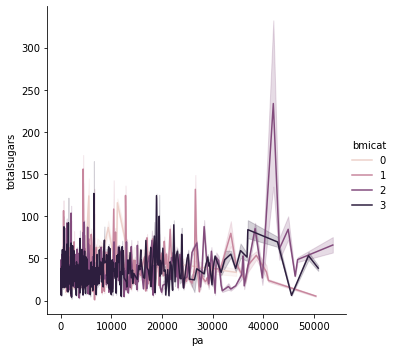

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

df_plot = df_clean_lvl2[(df_clean_lvl2['bmicat'] != 'Underweight')]


plt.figure(figsize=(15,8))
sns.relplot(x="pa",y="totalsugars", kind="line", data = df_plot, hue="bmicat")

plt.savefig("plot_bmi.png")

In [47]:
# testbmi = df_clean_lvl2[(df_clean_lvl2['bmicat'].isnull() == True)]
# testbmi
testdata = df_clean_lvl2[(df_clean_lvl2['energy'] == 0)]
testdata

,id,sex_x,age_x,wgt,hgt,bmi,pa,special_diet,clin_diet,water_d1,water_d2,index,mealtime,energy,totalpro,carb,fiber,totalfat,sfa,mufa,pufa,water,seafood_n3,chol,ca,fe,na,k,mg,zn,se,ph,cu,vitb1,vitb2,vitb3,vitb6,fol,vitb12,vitc,vita,bcarot,vitd,vite,vitk,totalsugars,bmicat


In [67]:
#df_profile = df_clean_lvl2.filter(['bmi', 'energy','totalpro','carb','fiber','totalfat','sfa','mufa','pufa','water','seafood_n3','chol','ca','fe','na','k','mg','zn','se','ph','cu','vitb1','vitb2','vitb3','vitb6','fol','vitb12','vitc','vita','bcarot','vitd','vite','vitk','totalsugars'])
df_profile = df_clean_lvl2.filter(['bmicat','bmi','age_x','pa','energy','mealtime','totalpro','carb','fiber','mufa','chol','pufa','totalfat','sfa','water','totalsugars'])
#df_clean_lvl2.info()
df_profile.drop_duplicates()


import pandas_profiling as pp
#profile = pp.ProfileReport(df_profile)
#profile

In [68]:
df_clean_lvl2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739594 entries, 0 to 792614
Data columns (total 47 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            739594 non-null  int64  
 1   sex_x         739594 non-null  int64  
 2   age_x         739594 non-null  float64
 3   wgt           739594 non-null  float64
 4   hgt           739594 non-null  float64
 5   bmi           739594 non-null  float64
 6   pa            739594 non-null  float64
 7   special_diet  739594 non-null  float64
 8   clin_diet     739594 non-null  float64
 9   water_d1      739594 non-null  float64
 10  water_d2      739594 non-null  float64
 11  index         739594 non-null  int64  
 12  mealtime      739594 non-null  object 
 13  energy        739594 non-null  float64
 14  totalpro      739594 non-null  float64
 15  carb          739594 non-null  float64
 16  fiber         739594 non-null  float64
 17  totalfat      739594 non-null  float64
 18  sfa 

In [69]:
from sklearn.model_selection import train_test_split
X = df_profile.drop(['bmi','bmicat'],axis=1)
y = df_profile[['bmi']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)


In [70]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=14, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=14, min_samples_leaf=5, random_state=42)

In [71]:
y_predict = clf_model.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.3935667493695874

In [75]:

dt_r_acc = []
for i in range(1,17,1):
    dt = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=i, min_samples_leaf=5) 
    dt.fit(X_train,y_train)
    dt_predict = dt.predict(X_test)
    dt_test_score = accuracy_score(y_test,dt_predict)
    
    
#     print('Score in training set: {:.3f}'.format(knn.score(X_train, y_train)))
#     print('Score in test set: {:.3f}'.format(knn.score(X_test, y_test)))

    
    
    dt_r_acc.append((i, dt_test_score))
    
df_dt = pd.DataFrame(dt_r_acc, columns=['depth','Accuracy Score'])
print(df_dt)




    depth  Accuracy Score
0       1        0.076772
1       2        0.078318
2       3        0.079579
3       4        0.087404
4       5        0.092932
5       6        0.103229
6       7        0.116853
7       8        0.135912
8       9        0.158935
9      10        0.188622
10     11        0.228308
11     12        0.272019
12     13        0.321484
13     14        0.381219
14     15        0.439808
15     16        0.493334


In [219]:
import pickle
# Dump the trained decision tree classifier with Pickle
decision_tree_pkl_filename = 'decision_tree_classifier.pkl'
# Open the file to save as pkl file
decision_tree_model_pkl = open(decision_tree_pkl_filename, 'wb')
pickle.dump(clf_model, decision_tree_model_pkl)
# Close the pickle instances
decision_tree_model_pkl.close()

In [220]:
# Load the model as your software engineer would.

decision_tree_model_pkl_ld = open(decision_tree_pkl_filename, 'rb')
decision_tree_model_ld = pickle.load(decision_tree_model_pkl_ld)
#latest_model = load_model('decision_tree_classifier_20170212')

In [231]:
# Tes library
df_predict = pd.read_csv("bmi_test.csv")
print(df_predict)
#predicted_value = predict_model(latest_model, data=df_predict)
print(decision_tree_model_ld.predict(df_predict))

   age_x    pa  energy  mealtime  totalpro  carb  fiber  mufa  chol  pufa  \
0     33  2000     777         1        29    88      5    11   180     9   

   totalfat  sfa  water  totalsugars  
0        36   12    854           35  
[29.]


In [212]:
testdata = df_profile[(df_profile['pa'] == 1500) & (df_profile['age_x'] == 62.0 )]
testdata

,bmicat,bmi,age_x,pa,energy,mealtime,totalpro,carb,fiber,mufa,chol,pufa,totalfat,sfa,water,totalsugars


In [73]:
df_profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 739594 entries, 0 to 792614
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   bmicat       739594 non-null  int64  
 1   bmi          739594 non-null  float64
 2   age_x        739594 non-null  float64
 3   pa           739594 non-null  float64
 4   energy       739594 non-null  float64
 5   mealtime     739594 non-null  object 
 6   totalpro     739594 non-null  float64
 7   carb         739594 non-null  float64
 8   fiber        739594 non-null  float64
 9   mufa         739594 non-null  float64
 10  chol         739594 non-null  float64
 11  pufa         739594 non-null  float64
 12  totalfat     739594 non-null  float64
 13  sfa          739594 non-null  float64
 14  water        739594 non-null  float64
 15  totalsugars  739594 non-null  float64
dtypes: float64(14), int64(1), object(1)
memory usage: 95.9+ MB


In [66]:
print(X)

        age_x      pa       energy mealtime   totalpro        carb      fiber  \
0        62.0   920.0   777.136078        1  26.580977   88.325395   5.538858   
1        62.0   920.0  1331.891997        2  76.152137  120.433539  11.489617   
2        62.0   920.0   154.000000        3   2.080000   28.705000   2.700000   
3        62.0   920.0   777.136078        1  26.580977   88.325395   5.538858   
4        62.0   920.0  1331.891997        2  76.152137  120.433539  11.489617   
...       ...     ...          ...      ...        ...         ...        ...   
792610   24.0  2160.0   492.000000        2  31.270000   32.045000   8.150000   
792611   24.0  2160.0   382.415089        3  29.199684   13.055889   4.673132   
792612   24.0  2160.0   101.000000        1   2.875000   21.725000   3.250000   
792613   24.0  2160.0   492.000000        2  31.270000   32.045000   8.150000   
792614   24.0  2160.0   382.415089        3  29.199684   13.055889   4.673132   

             mufa        ch

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn import preprocessing # processing.scale // for scaling continuous variable


X = df_profile.drop(['bmi','bmicat'],axis=1)
Y_classification = df_profile[['bmi']]


X_train, X_test, y_train, y_test = train_test_split(X, Y_classification, test_size=1 / 4, random_state=42,
                                                    stratify=Y_classification)
print(X_train.shape)
print(X_test.shape)


# knn_model=KNeighborsClassifier(n_neighbors=5)
# knn_model.fit(X_train, y_train)

# print('Score in training set: {:.3f}'.format(knn_model.score(X_train, y_train)))
# print('Score in test set: {:.3f}'.format(knn_model.score(X_test, y_test)))


knn_r_acc = []
for i in range(1,17,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    train_score = knn.score(X_train,y_train)
    
#     print('Score in training set: {:.3f}'.format(knn.score(X_train, y_train)))
#     print('Score in test set: {:.3f}'.format(knn.score(X_test, y_test)))

    
    
    knn_r_acc.append((i, test_score ,train_score))
    
df_knn = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
print(df_knn)

(554695, 14)
(184899, 14)
     K  Test Score  Train Score
0    1    0.999992     1.000000
1    2    0.999992     1.000000
2    3    0.999992     1.000000
3    4    0.999962     0.999989
4    5    0.999902     0.999960
5    6    0.999797     0.999907
6    7    0.999623     0.999813
7    8    0.999363     0.999664
8    9    0.998995     0.999440
9   10    0.998497     0.999119
10  11    0.997854     0.998684
11  12    0.997035     0.998118
12  13    0.996011     0.997391
13  14    0.994779     0.996487
14  15    0.993342     0.995399
15  16    0.991667     0.994102


In [226]:
import pickle
# Dump the trained decision tree classifier with Pickle
knn_filename = 'knn_classifier.pkl'
# Open the file to save as pkl file
knn_model_pkl = open(knn_filename, 'wb')
pickle.dump(knn_model, knn_model_pkl)
# Close the pickle instances
knn_model_pkl.close()

In [227]:
# Load the model as your software engineer would.

knn_model_pkl_ld = open(knn_filename, 'rb')
knn_model_ld = pickle.load(knn_model_pkl_ld)
#latest_model = load_model('decision_tree_classifier_20170212')

In [232]:
# Tes library
df_predict = pd.read_csv("bmi_test.csv")
print(df_predict)
#predicted_value = predict_model(latest_model, data=df_predict)
print(knn_model_ld.predict(df_predict))

   age_x    pa  energy  mealtime  totalpro  carb  fiber  mufa  chol  pufa  \
0     33  2000     777         1        29    88      5    11   180     9   

   totalfat  sfa  water  totalsugars  
0        36   12    854           35  
[25.]
